<a href="https://colab.research.google.com/github/m-poppins/coursera/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Подготовка данных

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/data/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/drive/My Drive/data/fashion-mnist_test.csv') 

In [ ]:
X_train = df_train.loc[:,'pixel1':]
y_train = df_train.loc[:,'label']

X_test = df_test.loc[:,'pixel1':]
y_test = df_test.loc[:,'label']

In [ ]:
X_train = np.array(X_train.values)
y_train = np.array(y_train.values)

X_test = np.array(X_test.values)
y_test = np.array(y_test.values)

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

###Логистическая регрессия

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,)))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
) 

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/logs',
                                                      write_graph=True,
                                                      update_freq="epoch")
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0, 
                 callbacks=[tensorboard_callback])


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("logistic regression, accuracy: {0:.4f}".format(accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8573
logistic regression, accuracy: 0.8573


In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/My Drive/logs/'

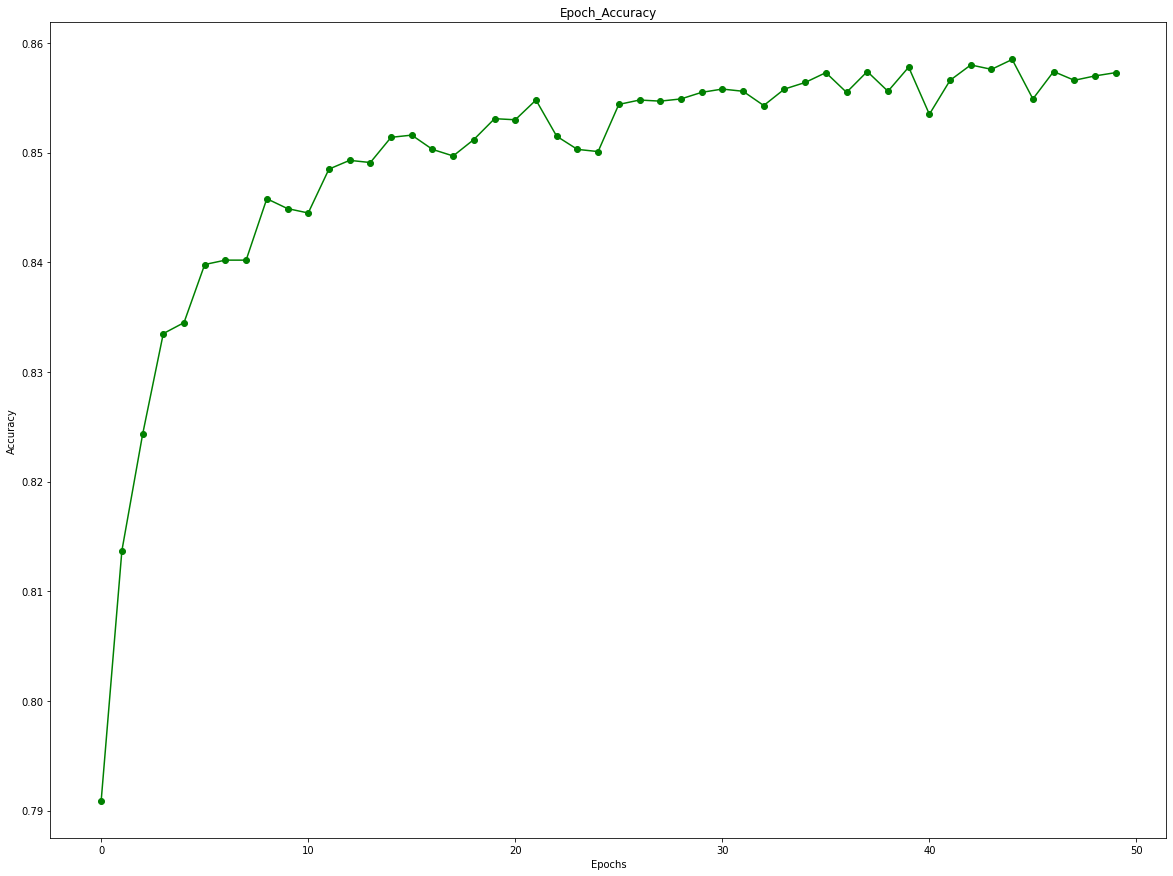

In [ ]:
plot_df = pd.read_csv('/content/drive/My Drive/data/scalars.csv')
x, y = plot_df[['Step']].values, plot_df[['Value']].values
plt.rcParams["figure.figsize"] = [20, 15]
plt.title('Epoch_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(x, y, '-o', c='green')
plt.show()

###Полносвязная нейронная сеть с несколькими скрытыми слоями

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)))
model2.add(tf.keras.layers.Dense(500, activation='relu'))
model2.add(tf.keras.layers.Dense(200, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model2.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [ ]:
model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4885 - accuracy: 0.8223 - val_loss: 0.3949 - val_accuracy: 0.8523
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3715 - accuracy: 0.8636 - val_loss: 0.3584 - val_accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3329 - accuracy: 0.8789 - val_loss: 0.3447 - val_accuracy: 0.8738
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3090 - accuracy: 0.8859 - val_loss: 0.3199 - val_accuracy: 0.8803
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2900 - accuracy: 0.8899 - val_loss: 0.3163 - val_accuracy: 0.8818
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2757 - accuracy: 0.8973 - val_loss: 0.3101 - val_accuracy: 0.8881
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2606 - accuracy: 0.9023 - val_loss: 0.3278 -

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)

print("fully-connected neural network, accuracy: {0:.4f}".format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3001 - accuracy: 0.8962
fully-connected neural network, accuracy: 0.8962


Качество полносвязной нейронной сети на 3,89% выше, чем у линейной регрессии. 
Линейную регрессию можно считать наиболее простым случаем полносвязной нейронной сети. Вариант полносвязной нейронной сети имел более сложную структуру и в связи с этим качество обучения модели повысилось.

###Сверточная нейронная сеть

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model3.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [ ]:
model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.4739 - accuracy: 0.8286 - val_loss: 0.3423 - val_accuracy: 0.8775
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3145 - accuracy: 0.8848 - val_loss: 0.2812 - val_accuracy: 0.8993
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2704 - accuracy: 0.9011 - val_loss: 0.2576 - val_accuracy: 0.9033
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2401 - accuracy: 0.9114 - val_loss: 0.2495 - val_accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2146 - accuracy: 0.9205 - val_loss: 0.2371 - val_accuracy: 0.9132
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1938 - accuracy: 0.9278 - val_loss: 0.2370 - val_accuracy: 0.9155
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1753 - accuracy: 0.9344 - val_loss: 0.2292 -

In [ ]:
loss, accuracy = model3.evaluate(X_test, y_test)

print("convolutional neural network, accuracy: {0:.4f}".format(accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.2419 - accuracy: 0.9184
convolutional neural network, accuracy: 0.9184


Качество сверточной нейронной сети по сравнению с полносвязной увеличилось на 2,22%.

Добавим дополнительные слои и посмотрим, как изменится качество

In [ ]:
model4 = tf.keras.models.Sequential()

model4.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model4.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D((2,2)))

model4.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model4.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D((2,2)))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(64, activation='relu'))
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

model4.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [ ]:
model4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.4817 - accuracy: 0.8238 - val_loss: 0.3391 - val_accuracy: 0.8718
Epoch 2/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.2968 - accuracy: 0.8910 - val_loss: 0.2669 - val_accuracy: 0.9009
Epoch 3/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.2448 - accuracy: 0.9107 - val_loss: 0.2411 - val_accuracy: 0.9132
Epoch 4/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.2135 - accuracy: 0.9222 - val_loss: 0.2238 - val_accuracy: 0.9205
Epoch 5/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1909 - accuracy: 0.9299 - val_loss: 0.2105 - val_accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1706 - accuracy: 0.9370 - val_loss: 0.2194 - val_accuracy: 0.9205
Epoch 7/10
1875/1875 [==============================] - 138s 74ms/step - loss: 0.1526 - accuracy: 0.9436 - val_loss: 0

In [ ]:
loss, accuracy = model4.evaluate(X_test, y_test)

print("convolutional neural network, accuracy: {0:.4f}".format(accuracy))

313/313 [==============================] - 6s 20ms/step - loss: 0.2425 - accuracy: 0.9235
convolutional neural network, accuracy: 0.9235


После добавления нескольких слоев, качество сверточной нейронной сети увеличилось еще на 0,5%.

In [ ]:
model5 = tf.keras.models.Sequential()

model5.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.MaxPooling2D((2,2)))

model5.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.MaxPooling2D((2,2)))

model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model5.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [ ]:
model5.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.3878 - accuracy: 0.8599 - val_loss: 0.2996 - val_accuracy: 0.8918
Epoch 2/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2580 - accuracy: 0.9064 - val_loss: 0.2795 - val_accuracy: 0.8937
Epoch 3/10
1875/1875 [==============================] - 173s 92ms/step - loss: 0.2175 - accuracy: 0.9208 - val_loss: 0.2294 - val_accuracy: 0.9177
Epoch 4/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1901 - accuracy: 0.9295 - val_loss: 0.2215 - val_accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1669 - accuracy: 0.9377 - val_loss: 0.2338 - val_accuracy: 0.9184
Epoch 6/10
1875/1875 [==============================] - 173s 92ms/step - loss: 0.1453 - accuracy: 0.9466 - val_loss: 0.2351 - val_accuracy: 0.9179
Epoch 7/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1260 - accuracy: 0.9519 - val_loss: 0

In [ ]:
loss, accuracy = model5.evaluate(X_test, y_test)

print("convolutional neural network, accuracy: {0:.4f}".format(accuracy))

313/313 [==============================] - 7s 22ms/step - loss: 0.2493 - accuracy: 0.9269
convolutional neural network, accuracy: 0.9269


Качество модели улучшилось еще на 0.3%.

Лучшее качество, которого удалось достигнуть составляет 92.69%.

In [ ]:
model.save('/content/drive/My Drive/model.h5')
model2.save('/content/drive/My Drive/model2.h5')
model3.save('/content/drive/My Drive/model3.h5')
model4.save('/content/drive/My Drive/model4.h5')
model5.save('/content/drive/My Drive/model5.h5')
